<a href="https://colab.research.google.com/github/kwanda2426/AI_Spectrum/blob/main/geospatial/HW_5%20/Practical_Dimensionality_Reduction_1077167.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:green">Kwanda Mazibuko - stdnr - 1077167
</span>

# <span style="color:blue">Practical: Dimensionality Reduction
</span>

# **Import Libraries**

In [1]:
#%pip install geemap

In [2]:

import numpy as np
import pandas as pd
import geopandas as gpd
import geemap

import seaborn as sns                                     # density plots
import matplotlib.pyplot as plt                           # general plotting
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# **Load Data**

In [3]:
# Load data from Github
url = "https://raw.githubusercontent.com/kwanda2426/projects/main/geospatial/HW_5/Processed_Assen_RS_data.csv"
input_data = pd.read_csv(url)

size = (172, 284)

In [4]:
input_data.head()

,Unnamed: 0,Longitude,Latitude,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,0,27.564250,-25.105965,188,227,363,406,750,709,440
1,1,27.564548,-25.105963,126,144,215,166,917,479,232
2,2,27.564845,-25.105962,141,187,421,310,2263,947,438
3,3,27.565143,-25.105961,111,170,402,291,2558,1154,562
4,4,27.565440,-25.105960,232,365,658,779,2409,2199,1319


#### Basic data pre-processing to further process the tabular data, as well as to extract metadata

In [5]:
# We'll need some lists of similar types of metadata to make referencing the data easier
coord_names = ['Longitude', 'Latitude']
bands = ['Band1', 'Band2','Band3', 'Band4', 'Band5', 'Band6', 'Band7']


input_data['Latitude'] = pd.to_numeric(input_data['Latitude'], errors='coerce') #convert latitude to numeric values
input_data['Longitude'] = pd.to_numeric(input_data['Longitude'], errors='coerce') #convert longitude to numeric values



for band in bands:
    input_data[band] = np.abs(pd.to_numeric(input_data[band], errors='coerce')) #make all chemical composition to be numeric


input_data.describe() #print cleaned combined df

,Unnamed: 0,Longitude,Latitude,Band1,Band2,Band3,Band4,Band5,Band6,Band7
count,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000,48848.000000
mean,24423.500000,27.606466,-25.128960,251.722547,316.526327,509.547433,609.615419,1648.147539,1801.414490,1216.814609
std,14101.347312,0.024398,0.013452,94.493587,106.311331,145.656643,238.682890,446.999961,469.584012,432.462650
min,0.000000,27.564250,-25.152291,0.000000,62.000000,149.000000,121.000000,150.000000,141.000000,102.000000
25%,12211.750000,27.585356,-25.140607,186.000000,248.000000,436.000000,467.000000,1382.000000,1539.000000,937.750000
50%,24423.500000,27.606466,-25.128958,245.000000,312.000000,498.000000,577.000000,1585.000000,1830.000000,1196.000000
75%,36635.250000,27.627580,-25.117309,312.000000,377.000000,562.000000,706.000000,1865.000000,2070.000000,1454.000000
max,48847.000000,27.648697,-25.105620,968.000000,1171.000000,1834.000000,2558.000000,5025.000000,4031.000000,3158.000000


# **PCA**


In [6]:
features = input_data[bands].copy()

for name in bands:
    features[name] = pd.to_numeric(features[name], errors='coerce')

features.fillna(0, inplace=True)

features.head(10)

,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,188,227,363,406,750,709,440
1,126,144,215,166,917,479,232
2,141,187,421,310,2263,947,438
3,111,170,402,291,2558,1154,562
4,232,365,658,779,2409,2199,1319
5,257,395,675,927,1785,2221,1413
6,278,445,735,1015,1865,2363,1528
7,284,448,742,1043,1817,2382,1576
8,259,428,726,997,1835,2347,1555
9,285,464,755,1052,1892,2409,1536


#### ML-specific data pre-processing


In [7]:
%%time

scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features[bands])

features_scaled = pd.DataFrame(features_scaled,columns=features[bands].columns, index=features.index)
features_scaled

CPU times: user 17.9 ms, sys: 4.95 ms, total: 22.9 ms
Wall time: 85 ms


,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,0.194215,0.148783,0.127003,0.116947,0.123077,0.146015,0.110602
1,0.130165,0.073940,0.039169,0.018465,0.157333,0.086889,0.042539
2,0.145661,0.112714,0.161424,0.077554,0.433436,0.207198,0.109948
3,0.114669,0.097385,0.150148,0.069758,0.493949,0.260411,0.150524
4,0.239669,0.273219,0.302077,0.270004,0.463385,0.529049,0.398233
...,...,...,...,...,...,...,...
48843,0.393595,0.348963,0.313353,0.313090,0.365333,0.593830,0.538940
48844,0.421488,0.379621,0.338872,0.359048,0.346667,0.617738,0.643325
48845,0.376033,0.317403,0.258160,0.276980,0.269538,0.548329,0.633835
48846,0.399793,0.318305,0.246884,0.256053,0.254154,0.529049,0.577552


In [8]:
# Let's recall what our data looked like

X = features_scaled
X.head()

,Band1,Band2,Band3,Band4,Band5,Band6,Band7
0,0.194215,0.148783,0.127003,0.116947,0.123077,0.146015,0.110602
1,0.130165,0.073940,0.039169,0.018465,0.157333,0.086889,0.042539
2,0.145661,0.112714,0.161424,0.077554,0.433436,0.207198,0.109948
3,0.114669,0.097385,0.150148,0.069758,0.493949,0.260411,0.150524
4,0.239669,0.273219,0.302077,0.270004,0.463385,0.529049,0.398233


In [9]:
# instantiatePCA
pca = PCA(n_components = None, svd_solver = 'full')
x_pca = pca.fit(X)

In [10]:
# explained variance ratios
x_pca.explained_variance_ratio_

array([0.83127504, 0.10996043, 0.02933562, 0.01812405, 0.0090623 ,
       0.0013634 , 0.00087916])

In [11]:
# Number of components
x = [pc+1 for pc in range(len(x_pca.explained_variance_ratio_))]

# Vector of ratios
y = x_pca.explained_variance_ratio_

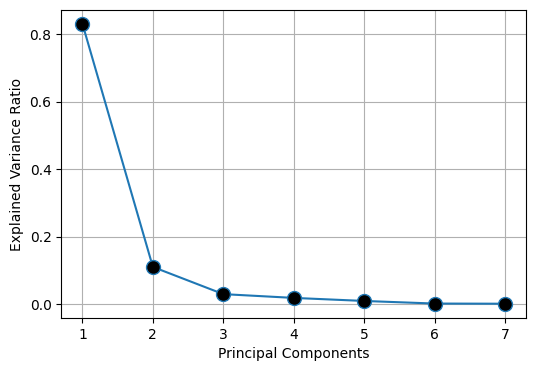

In [12]:
# plot results
plt.figure(figsize=(6,4))
plt.plot(x, y, markersize = 10, marker = 'o', markerfacecolor = 'k')


plt.grid(True)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")

plt.show()

The dataset is highly reducible using PCA. A single principal component contains almost all of the variability in the dataset.

PC 1 seems to be the most significant.

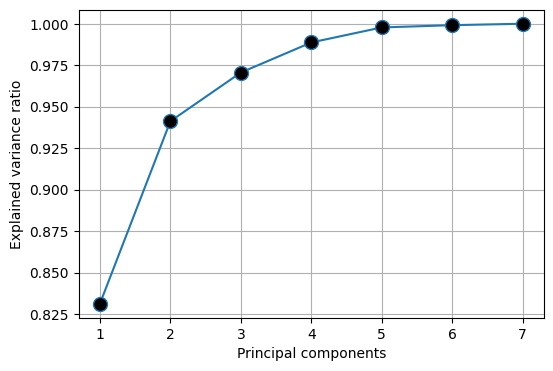

In [13]:
# Cumulative sum of the variance ratios
plt.figure(figsize = (6,4))
plt.plot(x, y.cumsum(), markersize = 10, marker = 'o', markerfacecolor = 'k')


plt.grid(True)
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")

plt.show()

At just 3 principal components, we capture almost 97.5% of the dataset's variability! That means we don't necessarily need that many bands for a lot of ML algorithms and can likely get away with far less. This reduces computational burden and can speed up a lot of workloads. This is actually a very common use of PCA for very large datasets.


In [14]:
# Let's analyze the component loadings a bit
loadings = x_pca.components_
num_pc = x_pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]

loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))

loadings_df['Band'] = X.columns.values

loadings_df = loadings_df.set_index('Band')
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Band,,,,,,,
Band1,0.355568,-0.217816,-0.245265,0.652263,-0.318858,-0.222083,-0.435355
Band2,0.363018,-0.074964,-0.385413,0.268336,0.170481,0.101991,0.776263
Band3,0.318954,0.183580,-0.403814,-0.219137,0.108248,0.708920,-0.373088
Band4,0.366050,-0.010905,-0.367513,-0.560135,0.134515,-0.622192,-0.108874
Band5,0.146733,0.890889,0.044317,0.078489,-0.383621,-0.128919,0.113474


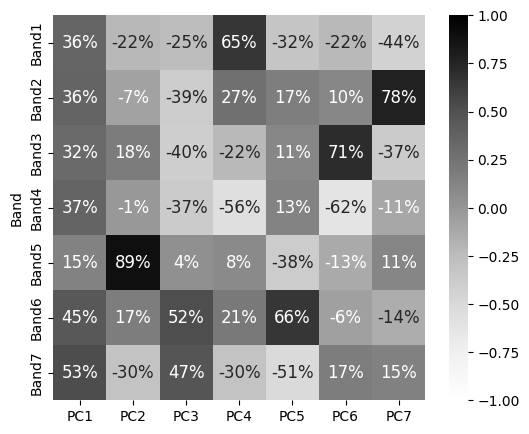

In [15]:
# One way to visualize this is through a heatmap

plt.figure(figsize = (6, 5))
sns.heatmap(loadings_df, vmin=-1, vmax=1, annot=True, fmt='.0%',cmap='Greys', annot_kws={"size":12})

plt.show()

We actually didn't transform the data yet. We only called the ".fit()" from the PCA object. Now we'll actually transform our dataset using the trained PCA model using the ".transform()" method. If you don't want to analyze the components and so on, you can most of the time in sklearn do fit and transform in one shot, using ".fit_transform()".

In [16]:
x_trans = pca.transform(X)
x_trans = pd.DataFrame(x_trans, columns = pc_list)
pca_data = pd.concat([input_data[coord_names], x_trans], axis = 1)



We'll also add the coordinates back to the PCA-transformed data to create a dataframe that simplifies visualization.

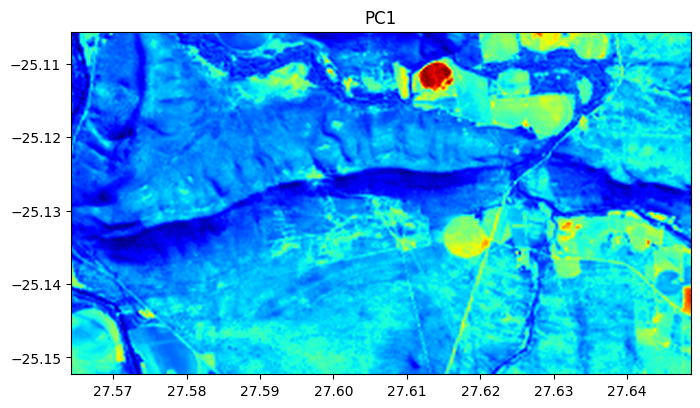

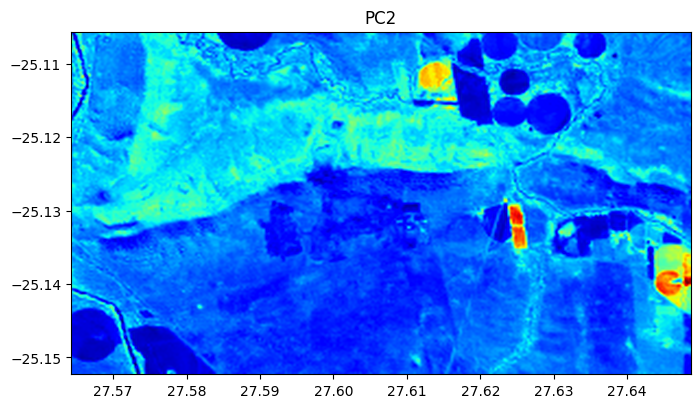

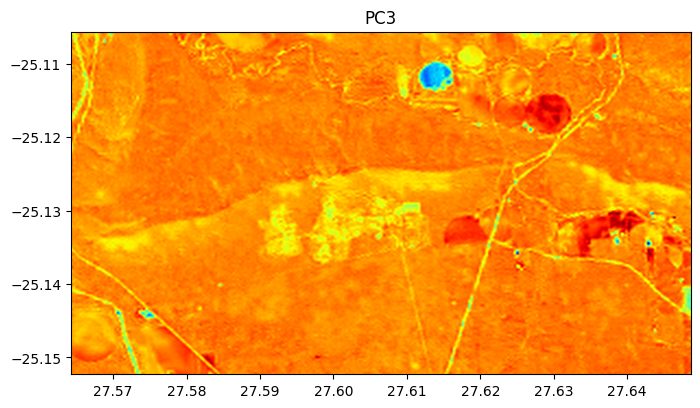

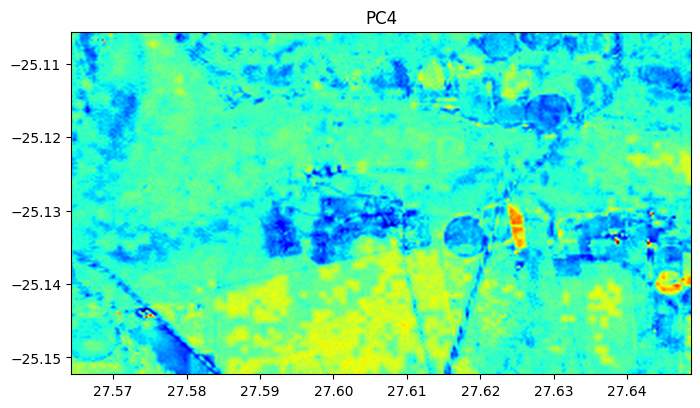

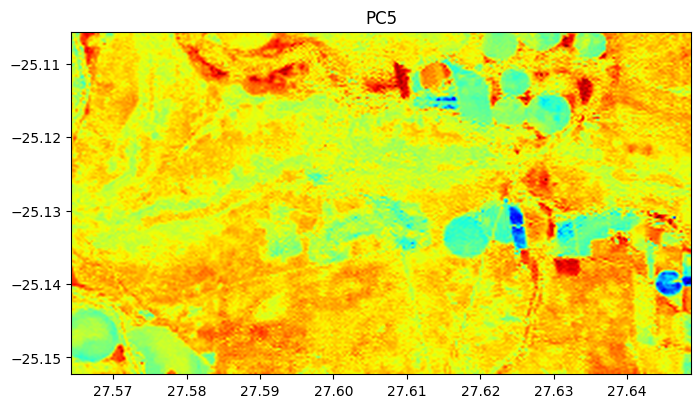

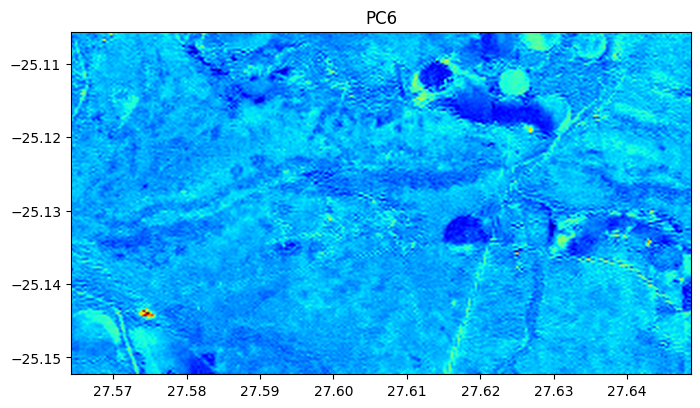

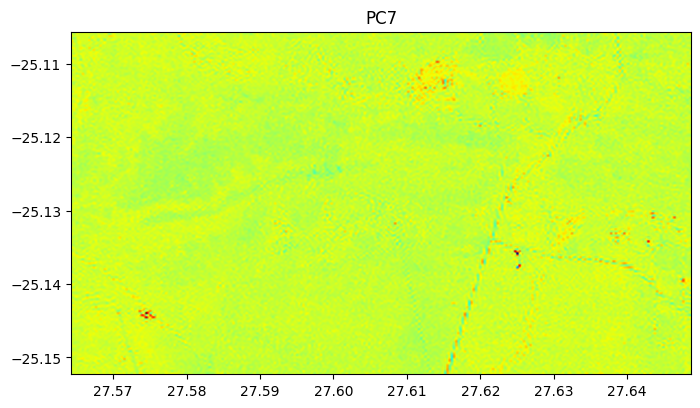

In [17]:
xmin = input_data['Longitude'].min()
xmax = input_data['Longitude'].max()
ymin = input_data['Latitude'].min()
ymax = input_data['Latitude'].max()

for pc in x_trans.columns:
    map_matrix = pca_data[pc].values.reshape(size)

    vmin = np.min(map_matrix)
    vmax = np.max(map_matrix)


    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)

    im =ax.imshow(map_matrix, cmap="jet",  vmin=vmin, vmax =vmax,
                   extent = [xmin,xmax, ymin,ymax], aspect=1, interpolation = 'lanczos')
    plt.title(pc)
    plt.show()





Notice how in the visualizations, a single PCA basically captured all the anthropogenic footprint in the image? In fact, after about principal component 3, there isn't much in the images. The last two images look like mostly noise. I think we are safe to discard most of the data in lieu of just a few first principal components.

### Assignment

Perform clustering on the original data and compare it with the PCA-reduced data. Use 3 principal components. I recommend you try k-Means clustering. You can pick the number of clusters (k) using the elbow method. You can also use the Yellowbricks package if you wish, which facilitates this.

Visualize the results of the clusters and compare between the results of the clusters of the original data and the PCA-reduced data at the same number of clusters. What do you see? Comment on your results.

# **K-Means**